# Geospatial Data Science Lecture 2

## 1. Basic Packages

1. **GeoPandas**  
   - Extends `pandas` to handle geospatial data.  
   - Core object: `GeoDataFrame`, which stores geometries (points, lines, polygons) and their attributes.
   - Read and write common file types: Shapefile, GeoJSON, etc.

2. **Shapely**  
   - Provides geometric objects (Point, LineString, Polygon) and operations like `distance`, `buffer`, `centroid`, etc.
   - Underlies much of GeoPandas’ geometry functionality.

3. **Rasterio** (for raster data)  
   - Handles reading/writing raster files, coordinate transformations, etc.

4. **pyproj**  
   - Library for coordinate reference systems (CRS) and datum transformations.

5. **matplotlib** or **plotly**  
   - Plotting libraries for visualizing geospatial data, histograms, and maps.

**Question** How do you know what package to use or install?
*Answer:* It is better to know the problem to determine what you really need or what you want to do, then determine which package to use.


In [2]:
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import os
import datetime

import shapely
from shapely.geometry import Point, LineString, Polygon
import pandas as pd
import rasterio as rio
from rasterio.plot import show
import pyproj


In [3]:
path = '/Users/moxballo/Library/Mobile Documents/com~apple~CloudDocs/Documents/UPSE/AY202425_2 Econ 198/'
data = path + '03_data/'
ne_shp = data + '110m_cultural/'
ne_airport = data + 'ne_10m_airports/'

## 2. Spatial Data Types

### 2.1 Vector Data
Vector data conceptualizes geographic space as a collection of discrete geometries. 
Spatial geometries as a collection of points over a geography. can be represented by different objects:

- **Point / MultiPoint**  
  Single (or multiple) latitude-longitude coordinates, e.g., cities, weather stations.
  
- **LineString / MultiLineString**  
  A line or set of lines defined by multiple connected points, e.g., roads, rivers.
  
- **Polygon / MultiPolygon**  
  Areas in geography with boundaries, e.g., country borders, protected areas.

**Key idea**: Vector data precisely locates features (points, lines, polygons) over a coordinate system. Attributes (e.g., population, city name) are stored alongside each feature.

### 2.2 Raster Data
- **Raster** data represents the geography as continuous pixels (grid cells), where each cell has a value (e.g., elevation, temperature).  
- Typically used for high-resolution data like satellite imagery, DEM (digital elevation models), or land cover data.

| Vector | Raster |
|---|---|
| Points, lines, polygons | Gridded cells (pixels) |
| Discrete objects | Continuous surfaces |
| Usually smaller file sizes for large areas | Potentially large file sizes for high-resolution |

## 3. Data Sources

Here’s a **non-comprehensive** list of major spatial data sources:

- **[Natural Earth](https://www.naturalearthdata.com/downloads/)**: Immense GIS database
- **[SAGE](https://sedac.ciesin.columbia.edu/data/sets/browse)**: Large GIS database
- **[DIVA](https://www.diva-gis.org/gdata)**: GIS database by country
- **[GADM](https://gadm.org/data.html)**: Country boundaries (ADM0-4)
- **[USGS](https://earthexplorer.usgs.gov/)**: Satellite imagery
- **[MODIS](https://www.earthdata.nasa.gov/learn/find-data/near-real-time/rapid-response/modis-subsets)**: Satellite imagery
- **[SRTM](https://dwtkns.com/srtm/)**: Elevation data
- **[SAGE (land cover)](https://sage.nelson.wisc.edu/data-and-models/datasets/)**: Land cover data
- **[GFC (Global Forest Change)](http://earthenginepartners.appspot.com/science-2013-global-forest/download_v1.1.html)**: Forest change data
- **[gROADS](https://sedac.ciesin.columbia.edu/data/collection/groads)**: Road networks
- **[Mineral Resources](https://mrdata.usgs.gov/mrds/)**: Location of minerals
- **[AQUASTAT](https://www.fao.org/aquastat/en/databases/)**: Water-related data
- **[FAO-GAEZ](https://gaez.fao.org/)**: Farm/land-related data
- **[Harvest Choice](https://www.ifpri.org/project/harvestchoice)**: Farm/land-related data
- **[mapSPAM](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/PRFF8V)**: Farm/land-related data
- **[PS Lab](https://psl.noaa.gov/data/gridded/index.html)**: Temperature and precipitation data
- **[SPEI](https://spei.csic.es/database.html)**: Drought index data
- **[LSMS](https://www.worldbank.org/en/programs/lsms)**: Geocoded surveys
- **[DHS Surveys](https://dhsprogram.com/data/)**: Geocoded surveys
- **[Geographic Names](https://geographic.org/geographic_names/index.html)**: Geocoding localities
- **[LatLong.net](https://www.latlong.net/convert-address-to-lat-long.html)**: API to geocode place names
- **[NOAA VIIRS](https://www.ngdc.noaa.gov/eog/dmsp/downloadV4composites.html)**: Satellite nighttime lights

---

## 4. Vector Data and Geographical Projections

1. **Vector data** is a collection of points over a geography:
   - X-Y coordinates (or longitude-latitude).
   - The same geometry can be represented differently, depending on the chosen projection.

2. **Coordinate Reference System (CRS)**  
   - Defines how the 2D coordinates map onto the Earth’s surface.  
   - Most usual: **WGS 84** (`EPSG:4326`), with longitude ∈ (-180, 180) and latitude ∈ (-90, 90).  
   - “CRS” is a synonym to “geographical projection.”

3. **Key recommendation**  
   - Always check what projection your data uses.  
   - Standardize your projection in your application (e.g., reproject to `EPSG:4326` if combining multiple sources).

---

## 5. Vector Data in Python

### 5.1 Creating Geometries with Shapely

In [4]:
# Example: creating a few shapes
p1 = Point(3, 2)
line = LineString([(0, 0), (1, 2), (2, 1)])
poly = Polygon([(5, 5), (8, 5), (8, 8), (5, 8)])

In [5]:
# Create a GeoDataFrame from a list of shapely geometries
gdf = gpd.GeoDataFrame({
    'name': ['Point1', 'Line1', 'Polygon1'],
    'geometry': [p1, line, poly]
}, crs="EPSG:4326")  # set WGS 84

print(gdf)

       name                             geometry
0    Point1                          POINT (3 2)
1     Line1           LINESTRING (0 0, 1 2, 2 1)
2  Polygon1  POLYGON ((5 5, 8 5, 8 8, 5 8, 5 5))


<Axes: >

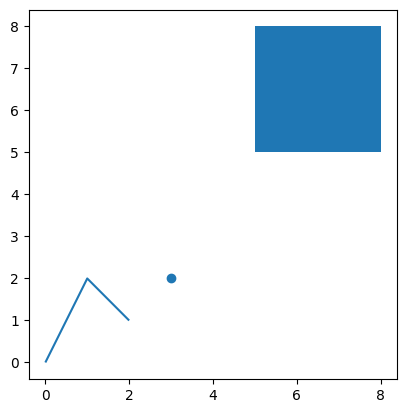

In [6]:
gdf.plot()

### HANDS ON: 

Using the shapefile from Natural Earth, map all the airports and differentiate the types by color

<Axes: >

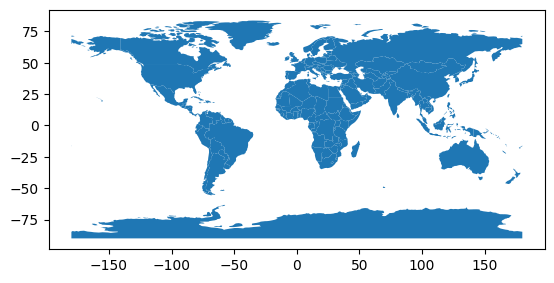

In [7]:
# import world map
world = gpd.read_file(ne_shp + 'ne_110m_admin_0_countries.shp')
world.plot()

In [11]:
world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

In [12]:
airport = gpd.read_file(ne_airport + 'ne_10m_airports.shp')
airport.head()

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_vi,name_zh,wdid_score,ne_id,name_fa,name_he,name_uk,name_ur,name_zht,geometry
0,9,Airport,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,8.0,...,None,None,4.0,1159113785,فرودگاه سهنول,None,None,None,None,POINT (75.95707 30.85036)
1,9,Airport,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,8.0,...,None,None,4.0,1159113803,فرودگاه سولاپور,None,None,None,None,POINT (75.93306 17.62542)
2,9,Airport,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,8.0,...,Sân bay Birsa Munda,比尔萨·蒙达机场,4.0,1159113831,فرودگاه بیرسا موندا,None,None,None,比爾薩·蒙達機場,POINT (85.3236 23.31772)
3,9,Airport,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,8.0,...,Sân bay Ahvaz,阿瓦士机场,4.0,1159113845,فرودگاه بین المللی اهواز,None,None,None,阿瓦士機場,POINT (48.74711 31.34316)
4,9,Airport,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,8.0,...,Sân bay Gwalior,辛迪亚航空站,4.0,1159113863,فرودگاه گوالیور,None,None,None,辛迪亞航空站,POINT (78.21722 26.28549)


In [13]:
airport.columns

Index(['scalerank', 'featurecla', 'type', 'name', 'abbrev', 'location',
       'gps_code', 'iata_code', 'wikipedia', 'natlscale', 'comments',
       'wikidataid', 'name_ar', 'name_bn', 'name_de', 'name_en', 'name_es',
       'name_fr', 'name_el', 'name_hi', 'name_hu', 'name_id', 'name_it',
       'name_ja', 'name_ko', 'name_nl', 'name_pl', 'name_pt', 'name_ru',
       'name_sv', 'name_tr', 'name_vi', 'name_zh', 'wdid_score', 'ne_id',
       'name_fa', 'name_he', 'name_uk', 'name_ur', 'name_zht', 'geometry'],
      dtype='object')

In [14]:
airport['type'].unique()

array(['small', 'mid', 'mid and military', 'major and military',
       'military mid', 'military', 'major', 'military major', 'spaceport'],
      dtype=object)

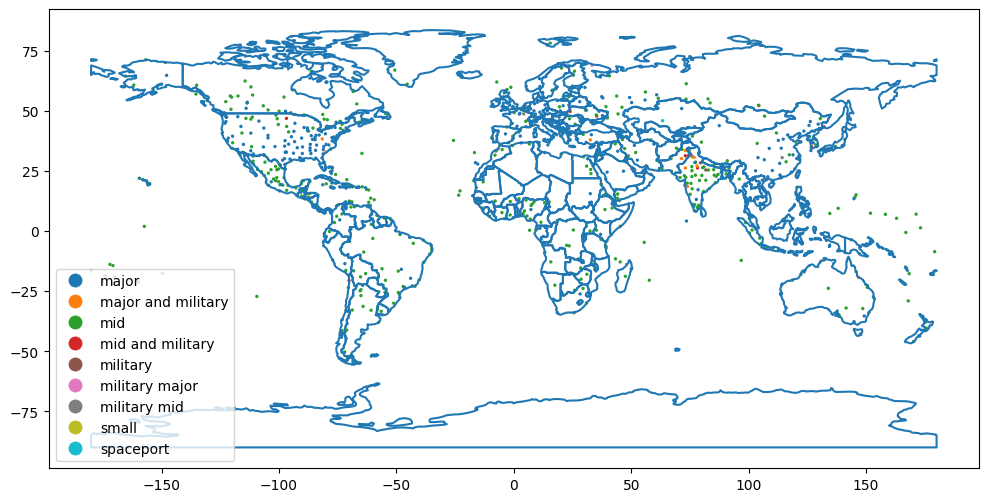

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
world.boundary.plot(ax=ax)
airport.plot(ax=ax, column='type', markersize=2, legend=True)

plt.show()

## Vector Data Operations
- Operations of spatial features (i.e. data wrangling): by attribute or geometry (spatial)
	- Attribute opperations: disciplined by the underlying attributes (feature's dataset)
	- Spatial operations: manipulations across the space (i.e. rotating, moving, distances, etc.)

### Attribute Operations
Operate on the non-spatial attributes, just like standard pandas.

- Selecting: restricting the fields (columns/choose fields)
- slicing: restricting the features (rows/ choose observations)
- filtering: restricting based on data attributes
- merging: linking attributes (i.e. data) between different datasets 
- aggregating: processing attributes (i.e. data) within a gdf



In [10]:
world = gpd.read_file(ne_shp + 'ne_110m_admin_0_countries.shp')
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 217.2+ KB


In [11]:
# max panda columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

### Selecting
Choose the fields (columns) you want to keep in the GeoDataFrame.

In [21]:
# Selecting: restricting the fields (columns/choose fields) 
cont = world[['NAME_LONG','CONTINENT', 'geometry']]
cont

,NAME_LONG,CONTINENT,geometry
0,Fiji,Oceania,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Tanzania,Africa,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Western Sahara,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,North America,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,United States,North America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...
172,Serbia,Europe,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,Europe,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Kosovo,Europe,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,North America,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


### Slicing 
Choosing the rows you want to keep in the GeoDataFrame.


In [22]:
# Choose only the first two rows
cont_2 = cont.loc[0:1]  
cont_2

,NAME_LONG,CONTINENT,geometry
0,Fiji,Oceania,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Tanzania,Africa,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."


### Filtering
Restricting the data based on the attributes.

In [23]:
# choose only South America
cont_sa = cont[cont['CONTINENT'] == 'South America']
cont_sa

,NAME_LONG,CONTINENT,geometry
9,Argentina,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5..."
10,Chile,South America,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,Falkland Islands / Malvinas,South America,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51..."
28,Uruguay,South America,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,Brazil,South America,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
30,Bolivia,South America,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0..."
31,Peru,South America,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251..."
32,Colombia,South America,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
40,Venezuela,South America,"POLYGON ((-60.73357 5.20028, -60.60118 4.9181,..."
41,Guyana,South America,"POLYGON ((-56.53939 1.89952, -56.7827 1.86371,..."


### Aggregating
Processing attributes (i.e. data) within a gdf

In [24]:
# create a df that will aggregate the 'POP_EST' column by 'CONTINENT'
pop = world[['CONTINENT', 'POP_EST']]
pop_cont = pop.groupby('CONTINENT').sum()

In [25]:
pop_cont

,POP_EST
CONTINENT,
Africa,1.306370e+09
Antarctica,4.490000e+03
Asia,4.550277e+09
Europe,7.454125e+08
North America,5.837560e+08
Oceania,4.120487e+07
Seven seas (open ocean),1.400000e+02
South America,4.270667e+08


### Merging

In [26]:
# rename the 'POP_EST' column to 'continent_population'
pop_cont.rename(columns={'POP_EST': 'continent_population'}, inplace=True)
pop_cont.reset_index(inplace=True)

# merge the 'pop_cont' df with the 'world' df
world = world.merge(pop_cont, on='CONTINENT')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,continent_population
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",4.120487e+07
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",1.306370e+09
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",1.306370e+09
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",5.837560e+08
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",5.837560e+08


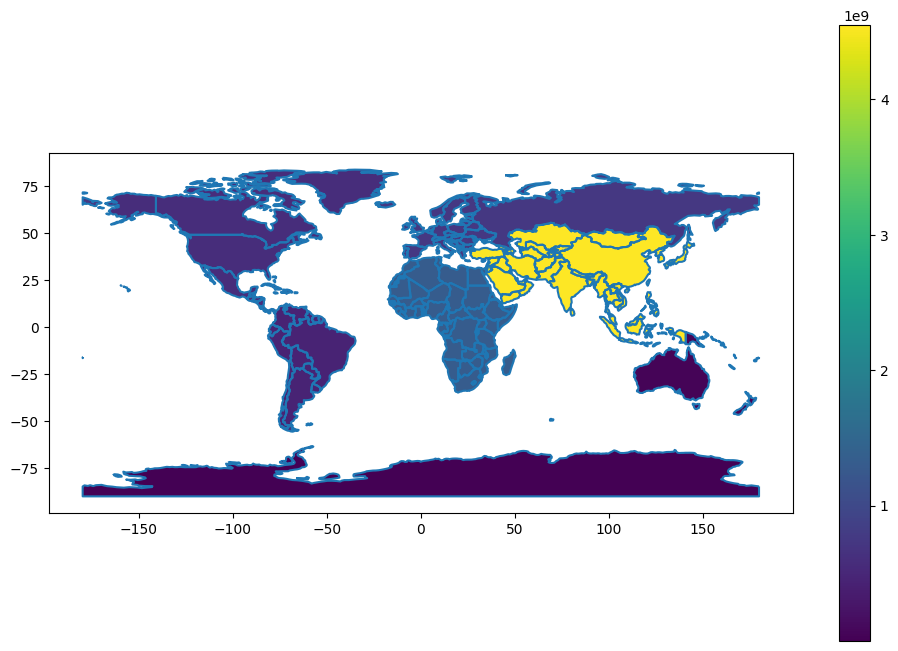

In [28]:
# Plot the population using choropleth
fig, ax = plt.subplots(figsize=(12,8))
world.boundary.plot(ax=ax)
world.plot(ax=ax, column='continent_population', legend=True)
legend = ax.get_legend()
plt.show()

In [29]:
import wbdata

wbdata.get_sources()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclusion Indicators
  34  Glob

In [30]:
indicator = {'NY.GDP.MKTP.CD':'GDP'}

# Get the data for all countries
countries = wbdata.get_dataframe(indicator, country='all')

# reset index of countries
wb_gdp = countries.reset_index()

In [31]:
wb_gdp

,country,date,GDP
0,Africa Eastern and Southern,2023,1.245472e+12
1,Africa Eastern and Southern,2022,1.191423e+12
2,Africa Eastern and Southern,2021,1.085745e+12
3,Africa Eastern and Southern,2020,9.333918e+11
4,Africa Eastern and Southern,2019,1.009721e+12
...,...,...,...
17019,Zimbabwe,1964,1.217138e+09
17020,Zimbabwe,1963,1.159512e+09
17021,Zimbabwe,1962,1.117602e+09
17022,Zimbabwe,1961,1.096647e+09


In [32]:
country_list = world['NAME_LONG'].to_list()

# select only the countries in the world df and year 2023 in wb_gdp
wb_gdp_df = wb_gdp[(wb_gdp['country'].isin(country_list)) & (wb_gdp['date'] == '2023')]
wb_gdp_df

,country,date,GDP
3136,Afghanistan,2023,1.723305e+10
3200,Albania,2023,2.354718e+10
3264,Algeria,2023,2.476262e+11
3456,Angola,2023,8.482465e+10
3584,Argentina,2023,6.460753e+11
...,...,...,...
16384,Uruguay,2023,7.724083e+10
16448,Uzbekistan,2023,1.015918e+11
16512,Vanuatu,2023,1.126313e+09
16896,Zambia,2023,2.757796e+10


In [33]:
wb_gdp.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  17024 non-null  object 
 1   date     17024 non-null  object 
 2   GDP      14307 non-null  float64
dtypes: float64(1), object(2)
memory usage: 399.1+ KB


# HANDS ON:
Create a Choropleth map of the world showing the following: 
- population density of each country
- gdp per capita of each country

In [34]:
world_equal_area = world.to_crs(epsg=6933)
world_equal_area['area_sqkm'] = world_equal_area.geometry.area / 1e6
world_area = world_equal_area[['NAME_LONG', 'area_sqkm']]

world = world.merge(world_area, on='NAME_LONG')
world


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,continent_population,area_sqkm
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",4.120487e+07,1.928760e+04
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",1.306370e+09,9.327793e+05
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",1.306370e+09,9.666925e+04
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",5.837560e+08,1.003773e+07
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",5.837560e+08,9.509851e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",7.454125e+08,7.637329e+04
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",7.454125e+08,1.344636e+04
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",7.454125e+08,1.123192e+04
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...",5.837560e+08,7.738923e+03


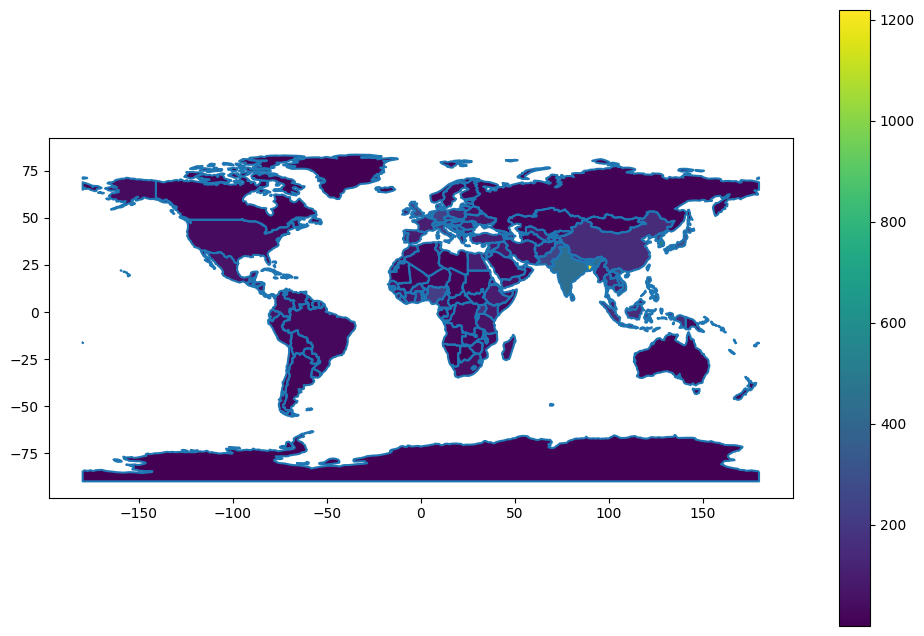

In [35]:
world['pop_dens'] = world['POP_EST'] / world['area_sqkm']

fig, ax = plt.subplots(figsize=(12,8))
world.boundary.plot(ax=ax)
world.plot(ax=ax, column='pop_dens', legend=True)
legend = ax.get_legend()
plt.show()

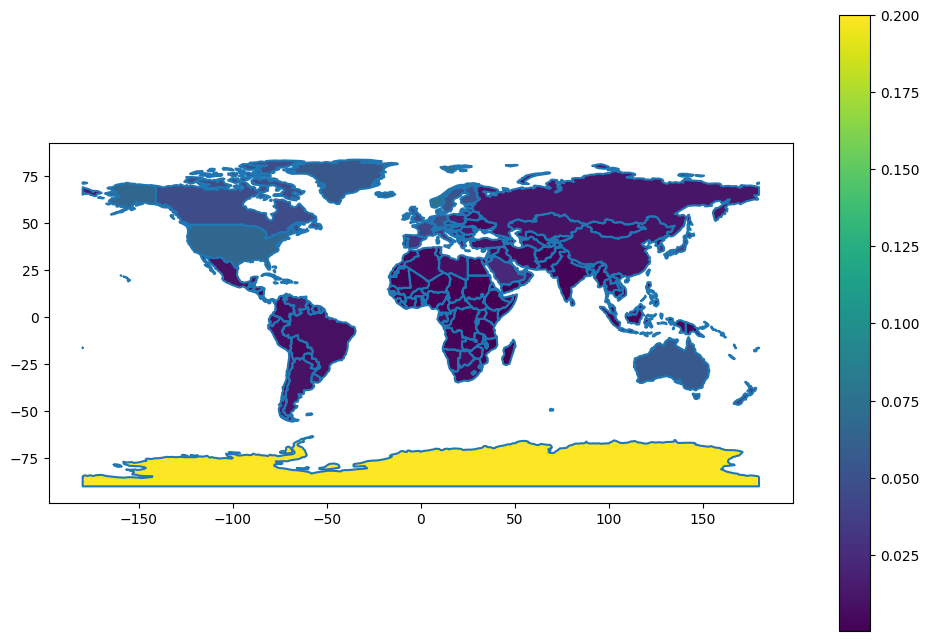

In [37]:
world['gdp_pc'] = world['GDP_MD'] / world['POP_EST']

fig, ax = plt.subplots(figsize=(12,8))
world.boundary.plot(ax=ax)
world.plot(ax=ax, column='gdp_pc', legend=True)
legend = ax.get_legend()
plt.show()

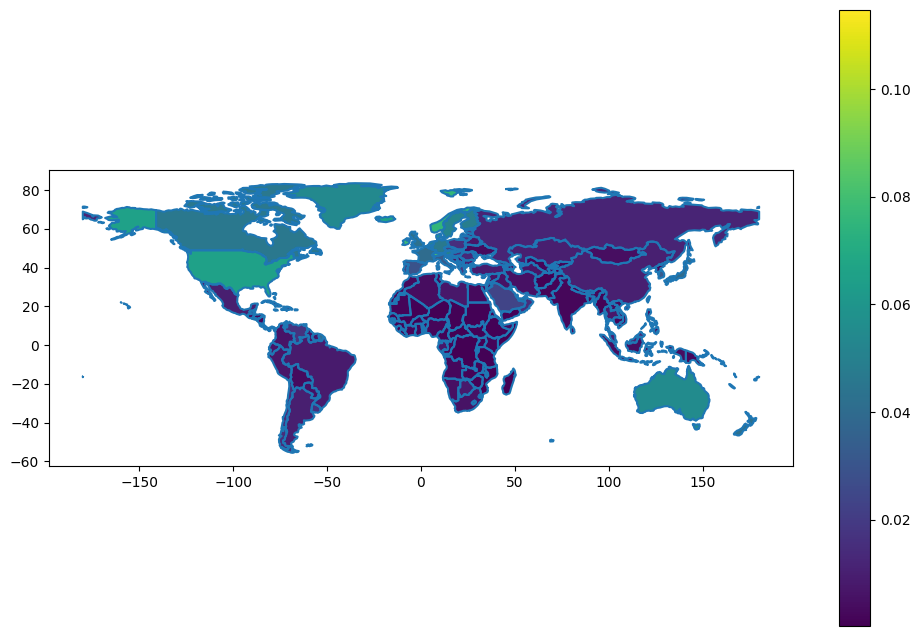

In [38]:
world_filt = world[world['NAME_LONG'] != 'Antarctica']

fig, ax = plt.subplots(figsize=(12,8))
world_filt.boundary.plot(ax=ax)
world_filt.plot(ax=ax, column='gdp_pc', legend=True)
legend = ax.get_legend()
plt.show()

In [ ]:
'GDP_MD', 'POP_EST'

## Spatial Operations
Operate on the geometry itself (e.g., rotating, buffering, distances, clipping).

### Unary Geometry Operations
- Operations on a single feature

1. Simplification - Reduces the number of vertices of a line since it can be CPU intense
1. Centroids - The center point of the geometry.
2. Buffering - Area around a geometry containing location or space within a certain distance
3. Casting - Transform a feature geometry type into another based on its vertices

/var/folders/sh/dzgcmtnd42b354w0mn1yt2x00000gn/T/ipykernel_67450/2362700120.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.geometry.centroid
/var/folders/sh/dzgcmtnd42b354w0mn1yt2x00000gn/T/ipykernel_67450/2362700120.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world.centroid.plot(ax=ax, color='red', markersize=3)


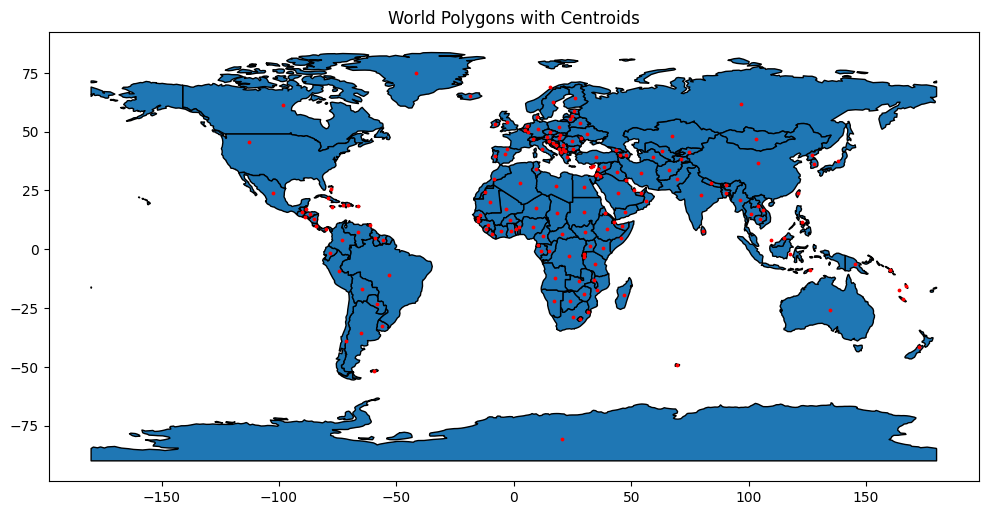

In [39]:
# Centroids
world['centroid'] = world.geometry.centroid

# plot the centroids
ax = world.plot(figsize=(12,8), edgecolor='black')
world.centroid.plot(ax=ax, color='red', markersize=3)
plt.title('World Polygons with Centroids')
plt.show()


#### Buffer

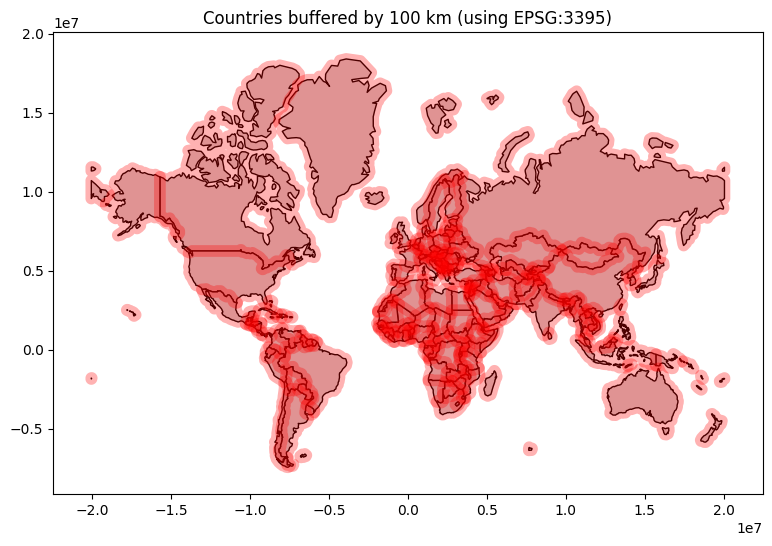

In [ ]:
# Reproject to a projected coordinate system (example: World Mercator: EPSG:3395)
world_mercator = world.copy()

#remove antartica
world_mercator = world_mercator[world_mercator['CONTINENT'] != 'Antarctica']
world_mercator = world_mercator.to_crs(epsg=3395)

# Perform the buffer in meter units
buffer_distance_meters = 370000  

buffered_countries = world_mercator.geometry.buffer(buffer_distance_meters)

# Optional: wrap into a new GeoDataFrame
buffered_gdf = gpd.GeoDataFrame(geometry=buffered_countries, crs=world_mercator.crs)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original
world_mercator.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot buffers
buffered_gdf.plot(ax=ax, color='red', alpha=0.3)
ax.set_aspect('equal')
ax.set_title(f"Countries buffered by 100 km (using EPSG:3395)")
plt.show()

### Binary Geometry Operations
Operations that interact two features

#### Clipping
The intersection of two geometries. 


<Axes: >

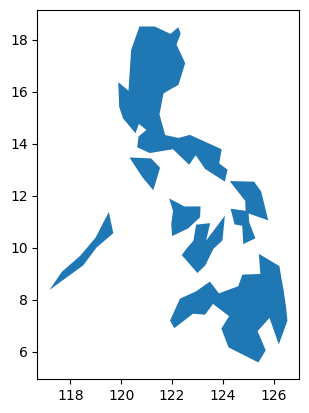

In [40]:
# huge file: more than 1GB for the whole asia 
road_path = '/Users/moxballo/Library/CloudStorage/GoogleDrive-roxanne.ballo@bse.eu/My Drive/Term2/Geospatial/groads-v1-asia-shp/gROADS-v1-asia.shp'
roads = gpd.read_file(road_path)

# obtain Philippine shape from world
ph = world[world['NAME_LONG'] == 'Philippines']

# plot Philippines
ph.plot()

In [25]:
# clip the roads within philippines
ph_roads = gpd.clip(roads, ph)

<Axes: >

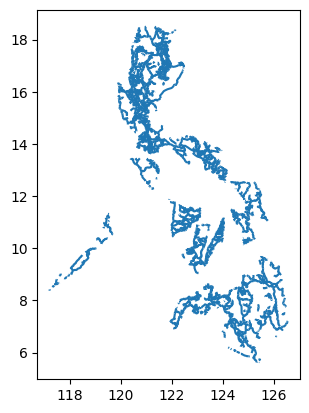

In [26]:
ph_roads.plot()

# HANDS ON

## Distances to Airports or Populated Places

Data: World and Airports from Natural Earth
1. Obtain the centroid of each country
2. Compute or approximate each centroid’s distance to the nearest airport (or city).
3. Summarize results by continent (e.g. average, min, or max distance
4. Make a bar plot or histogram of distances.